In [1]:
import os
import glob
from tensorflow.python.summary.summary_iterator import summary_iterator

import matplotlib.pylab as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import shuffle,resample
from sklearn.linear_model import Ridge


from time import time

%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns


In [3]:
sns.set(font_scale=1.5)
sns.set_style("white")


In [4]:

l_mse  = []
l_reg  = []
l_loss = []
l_IRC = []
l_IRCada = []
l_PoV = []
l_cnum = []
l_cnum_GT = []

for i,value in enumerate(summary_iterator(glob.glob('*.neptune')[0])):
    try:
        if value.summary.value[0].tag=="3_Training/mse":
            l_mse.append([value.step,value.summary.value[0].simple_value])
        if value.summary.value[0].tag=="3_Training/reg":
            l_reg.append([value.step,value.summary.value[0].simple_value])
        if value.summary.value[0].tag=="3_Training/loss":
            l_loss.append([value.step,value.summary.value[0].simple_value])
        
        if value.summary.value[0].tag=="7_IRC/IRC":
            l_IRC.append([value.step,value.summary.value[0].simple_value])
        if value.summary.value[0].tag=="7_IRC/IRC_Adaptive":
            l_IRCada.append([value.step,value.summary.value[0].simple_value])
         
        if value.summary.value[0].tag=="7_IRC/PoV":
            l_PoV.append([value.step,value.summary.value[0].simple_value])
       
            
        if value.summary.value[0].tag=="7_IRC/cond_num_adaptive":
            l_cnum.append([value.step,value.summary.value[0].simple_value])
            

        if value.summary.value[0].tag=="7_IRC/cond_num_adaptive_GT":
            l_cnum_GT.append([value.step,value.summary.value[0].simple_value])

            
        if i<3:
            print(value)
    except:
        print('no')

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
no
wall_time: 1633363012.269118
summary {
  value {
    tag: "3_Training/loss"
    simple_value: 0.13257120549678802
  }
}

wall_time: 1633363012.360864
summary {
  value {
    tag: "3_Training/mse"
    simple_value: 0.05234268680214882
  }
}



In [5]:
l_mse_test  = []

for i,value in enumerate(summary_iterator(glob.glob('4_Test/mse_test/1/*.neptune')[0])):
    try:
        if value.summary.value[0].tag=='4_Test/mse_test':
            l_mse_test.append([value.step,value.summary.value[0].simple_value])             
    except:
        print('no')

no


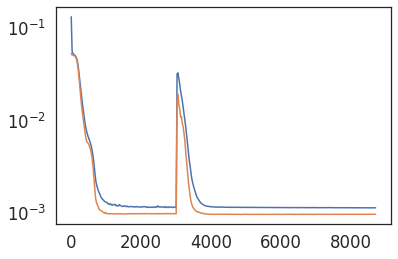

In [6]:
plt.plot(np.array(l_loss)[:,0],np.array(l_loss)[:,1])
plt.plot(np.array(l_mse_test)[:,0],np.array(l_mse_test)[:,1])
plt.yscale('log')

In [7]:
l_mse_test[-1]

[8700, 0.0009537190780974925]

In [8]:
l_probs=[]
for coeff in range(1,37):

    path =glob.glob('2_Masks/exp_0/'+str(coeff)+'/*.neptune')[0]
    

    #print(path)
    for i,value in enumerate(summary_iterator(path)):
        
        try:
            if value.summary.value[0].tag=="2_Masks/exp_0":
                l_probs.append([coeff,value.step,value.summary.value[0].simple_value])
                
        except:
            print('no')
m_probs = np.array(l_probs)
m_probs = m_probs.reshape(36,int(m_probs.shape[0]/36),3)

no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no
no


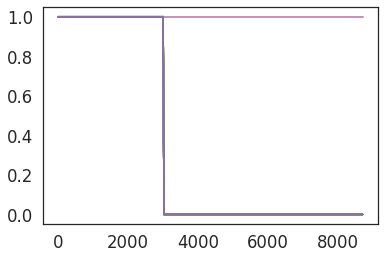

In [9]:
for i in range(1,36):

    plt.plot(m_probs[i][:,1],m_probs[i][:,2])

In [10]:
GT = [3,7]

mGT = np.zeros(m_probs.shape)


mGT[GT,:,2] = 1
selec_error = np.abs(m_probs-mGT)

total_error = selec_error[0][:,2]

for i in range(1,36):
    total_error = total_error + selec_error[i][:,2]

total_error[-1]

0.0

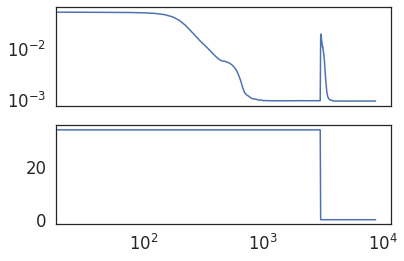

In [11]:

fig,ax = plt.subplots(2,1,sharex='col')


ax[0].plot(np.array(l_mse_test)[:,0],np.array(l_mse_test)[:,1])
ax[1].plot(selec_error[i][:,1],total_error)

ax[0].set_yscale('log')
ax[0].set_xscale('log')

In [12]:
x_test = np.array(l_mse_test)[:,0]
y_test = np.array(l_mse_test)[:,1]

y_selec = total_error

np.save('x_test',x_test)
np.save('y_test',y_test)
np.save('y_selec',y_selec)

